In [1]:
# Generate graphs for demonstration purposes
import utils.graph_generators as gen
import torch
import dgl

grids = gen.make_grid_graphs()
lobsters = gen.make_lobster_graphs()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
grids = [dgl.DGLGraph(g).to(device) for g in grids] # Convert graphs to DGL from NetworkX
lobsters = [dgl.DGLGraph(g).to(device) for g in lobsters] # Convert graphs to DGL from NetworkX

c:\Users\cs843\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_masked\__init__.py:223: UserWarning: Failed to initialize NumPy: module compiled against API version 0xf but this version of numpy is 0xe (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  example_input = torch.tensor([[-3, -2, -1], [0, 1, 2]])
c:\Users\cs843\AppData\Local\Programs\Python\Python310\lib\site-packages\dgl\heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


RuntimeError: Numpy is not available

In [2]:
proteins=gen.load_proteins()

In [6]:
proteins[0].nodes(data=True)

NodeDataView({1: {'label': 4}, 2: {'label': 2}, 3: {'label': 10}, 4: {'label': 4}, 5: {'label': 20}, 6: {'label': 19}, 7: {'label': 17}, 8: {'label': 11}, 9: {'label': 6}, 10: {'label': 11}, 11: {'label': 11}, 12: {'label': 13}, 13: {'label': 7}, 14: {'label': 4}, 15: {'label': 4}, 16: {'label': 2}, 17: {'label': 11}, 18: {'label': 18}, 19: {'label': 17}, 20: {'label': 9}, 21: {'label': 11}, 22: {'label': 8}, 23: {'label': 6}, 24: {'label': 1}, 25: {'label': 7}, 26: {'label': 17}, 27: {'label': 1}, 28: {'label': 15}, 29: {'label': 16}, 30: {'label': 16}, 31: {'label': 8}, 32: {'label': 2}, 33: {'label': 16}, 34: {'label': 6}, 35: {'label': 6}, 36: {'label': 2}, 37: {'label': 7}, 38: {'label': 8}, 39: {'label': 11}, 40: {'label': 11}, 41: {'label': 15}, 42: {'label': 10}, 43: {'label': 11}, 44: {'label': 9}, 45: {'label': 16}, 46: {'label': 15}, 47: {'label': 4}, 48: {'label': 12}, 49: {'label': 7}, 50: {'label': 4}, 51: {'label': 16}, 52: {'label': 11}, 53: {'label': 6}, 54: {'label': 

In [9]:
proteins[0].edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 30, {}), (1, 31, {}), (1, 260, {}), (1, 267, {}), (1, 268, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 7, {}), (2, 74, {}), (3, 74, {}), (3, 243, {}), (3, 260, {}), (3, 267, {}), (4, 5, {}), (4, 6, {}), (4, 243, {}), (4, 260, {}), (5, 6, {}), (5, 198, {}), (5, 199, {}), (5, 220, {}), (6, 246, {}), (7, 71, {}), (7, 74, {}), (7, 90, {}), (7, 93, {}), (7, 262, {}), (8, 9, {}), (8, 10, {}), (8, 11, {}), (8, 12, {}), (8, 55, {}), (8, 56, {}), (9, 10, {}), (9, 11, {}), (9, 12, {}), (9, 195, {}), (10, 11, {}), (10, 12, {}), (10, 55, {}), (10, 195, {}), (11, 12, {}), (11, 55, {}), (12, 55, {}), (12, 56, {}), (12, 195, {}), (12, 205, {}), (13, 14, {}), (13, 15, {}), (13, 16, {}), (13, 17, {}), (13, 185, {}), (13, 187, {}), (13, 200, {}), (14, 15, {}), (14, 16, {}), (14, 17, {}), (15, 16, {}), (15, 184, {}), (15, 187, {}), (15, 200, {}), (16, 17, {}), (16, 21, {}), (16, 138, {}), (17, 20, {}), (17, 21, {}), (17, 138, 

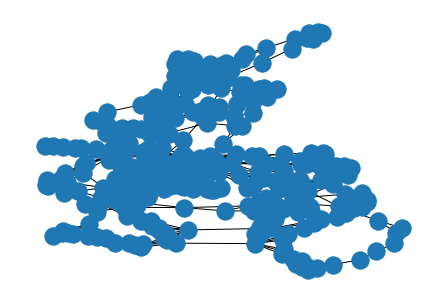

In [13]:
import networkx as nx
nx.draw(proteins[0])

In [2]:
# Compute all GNN-based metrics at once
from evaluation.evaluator import Evaluator
evaluator = Evaluator(device=device)
evaluator.evaluate_all(generated_dataset=grids, reference_dataset=lobsters)


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))


{'activations_time': 0.09900069236755371,
 'fid': 5126.874207380354,
 'fid_time': 0.10399937629699707,
 'kid': 613081.2,
 'kid_time': 8.362998247146606,
 'precision': 0.0,
 'recall': 0.0,
 'f1_pr': 1e-05,
 'precision_time': 0.12754583358764648,
 'recall_time': 0.12754583358764648,
 'f1_pr_time': 0.12754583358764648,
 'density': 0.0,
 'coverage': 0.0,
 'f1_dc': 1e-05,
 'density_time': 0.1172800064086914,
 'coverage_time': 0.1172800064086914,
 'f1_dc_time': 0.1172800064086914,
 'mmd_rbf': 1.3138309940695763,
 'mmd_rbf_time': 0.1250011920928955,
 'mmd_linear': 4773.8984,
 'mmd_linear_time': 0.09900069236755371}

In [3]:
# Alternatively, compute a single GNN-based metric. See evaluation/gin_evaluation.py for other metrics.
from evaluation.gin_evaluation import load_feature_extractor, MMDEvaluation

# Can tweak GIN hyperparameters, however defaults are set to our recommendations
gin = load_feature_extractor(device=device)
# Can tweak hyperparameters of MMD RBF, however defaults are set to our recommendations
mmd_eval = MMDEvaluation(gin)
result, time = mmd_eval.evaluate(generated_dataset=grids, reference_dataset=lobsters)
print('result: {}, time to compute: {:.3f}s'.format(result, time))

result: {'mmd_rbf': 1.3007222935557365}, time to compute: 0.115s


In [4]:
# Evaluation incorporating custom node/edge features.
# If no node features are provided, the default is degree features
# expressed as an integer.

node_feat_loc = 'attr'
edge_feat_loc = 'attr'
node_feat_dim = 10
edge_feat_dim = 5

# Create random node/edge features
for g in grids:
    num_nodes = g.number_of_nodes()
    g.ndata[node_feat_loc] = torch.randn(num_nodes, node_feat_dim).to(g.device)
    num_edges = g.number_of_edges()
    g.edata[edge_feat_loc] = torch.randn(num_edges, edge_feat_dim).to(g.device)
    
for g in lobsters:
    num_nodes = g.number_of_nodes()
    g.ndata[node_feat_loc] = torch.randn(num_nodes, node_feat_dim).to(g.device)
    num_edges = g.number_of_edges()
    g.edata[edge_feat_loc] = torch.randn(num_edges, edge_feat_dim).to(g.device)

# Load GIN
gin = load_feature_extractor(
    device=device, input_dim=node_feat_dim, edge_feat_dim=edge_feat_dim,
    node_feat_loc=node_feat_loc, edge_feat_loc=edge_feat_loc)

mmd_eval = MMDEvaluation(gin)
result, time = mmd_eval.evaluate(generated_dataset=lobsters, reference_dataset=grids)
print('result: {}, time to compute: {:.3f}s'.format(result, time))

result: {'mmd_rbf': 1.0303107798099518}, time to compute: 0.170s


In [5]:
# To quickly demonstrate sensitivity to node/edge features, let's create
# a copy of the grid graphs and slightly alter the node/edge feat distributions
import copy

result, time = mmd_eval.evaluate(generated_dataset=grids, reference_dataset=grids)
print('MMD RBF for grids with itself: {}'.format(result['mmd_rbf']))

grids_copy = [copy.deepcopy(g) for g in grids]
for g in grids_copy:
    g.ndata[node_feat_loc] *= 1.15
    g.edata[edge_feat_loc] *= 1.15
    
result, time = mmd_eval.evaluate(reference_dataset=grids, generated_dataset=grids_copy)
print('MMD RBF after altering node/edge feat. distributions: {}'.format(result['mmd_rbf']))

MMD RBF for grids with itself: 0
MMD RBF after altering node/edge feat. distributions: 0.033437252044677734
